In [1]:
import sys
import os
import pickle
import pandas as pd

sys.path.append(os.path.abspath(os.path.join("..", "src")))
# Pour créer et sauvegarder le pipeline
exec(open('../exportations/taf.py').read())

# Charger le pipeline
with open('../Models/Hotel_Complete_Pipeline.pkl', 'rb') as file:
    pipeline = pickle.load(file)

# Utiliser sur de nouvelles données
donnee_de_test = pd.read_csv('../Data/Test/Donnees_test.csv')
predictions = pipeline.predict(donnee_de_test)
probabilities = pipeline.predict_proba(donnee_de_test)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [2]:
# blabla

# Lancer la prédiction
# predictions = pipeline.predict(donnee_de_test)

# Créer le DataFrame
df_predictions = pd.DataFrame(predictions)

# Exporter sans nom de colonnes ni index
df_predictions.to_csv("predictions.csv", index=False, header=False)

In [4]:
# 1. Charger les données d'origine pour l'évaluation
df = pd.read_csv('../Data/Test/Donnees_test.csv')

# 2. Cibler la variable target
# Elle est encodée en binaire : 1 = Not Canceled, 0 = Canceled
y = (df['booking_status'] == 'Not_Canceled').astype(int)
X = df.drop(columns=['booking_status', 'Booking_ID'])

# 3. Split train/test
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Prédictions sur le test
y_pred = pipeline.predict(df)

# 5. Évaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

print('Random Forest Classifier:')
print("Accuracy sur les données de test : ", np.round(pipeline.score(x_test, y_test), 2))
print("Score moyen pendant RandomizedSearchCV : ",
      np.round(pipeline.best_score_, 2))
# Utilise les données brutes (avec toutes les colonnes, sauf 'Booking_ID')
print("Score moyen par validation croisée : ",
      np.round(np.mean(cross_val_score(pipeline.best_estimator_, df.drop(columns='Booking_ID'), y, cv=5)), 2))
print("Précision : ", np.round(precision_score(y_test, y_pred), 2))
print("Rappel : ", np.round(recall_score(y_test, y_pred), 2))
print("Erreur quadratique moyenne : ", np.round(mean_squared_error(y_test, y_pred), 4))
print("Accuracy (via accuracy_score) : ", np.round(accuracy_score(y_test, y_pred), 4))

# 6. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", cm)

# 7. Importance des variables
# Récupérer le modèle RandomForest depuis le pipeline
rf_model = pipeline.best_estimator_.named_steps['classifier']
feature_names = pipeline.best_estimator_.named_steps['preprocessor'].transform(X.head(1)).columns

# Vérifie si c’est bien un DataFrame
X_transformed = pipeline.best_estimator_.named_steps['preprocessor'].transform(X)
if not isinstance(X_transformed, pd.DataFrame):
    X_transformed = pd.DataFrame(X_transformed, columns=feature_names)

importances = rf_model.feature_importances_

# Plot
plt.figure(figsize=(10, 8))
indices = np.argsort(importances)
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), X_transformed.columns[indices])
plt.title("Importance des variables (Random Forest)")
plt.tight_layout()
plt.show()


KeyError: 'booking_status'

     prediction
0  Not_Canceled
1      Canceled
2  Not_Canceled
3  Not_Canceled
4  Not_Canceled
5  Not_Canceled
6  Not_Canceled
7  Not_Canceled
8  Not_Canceled
9      Canceled


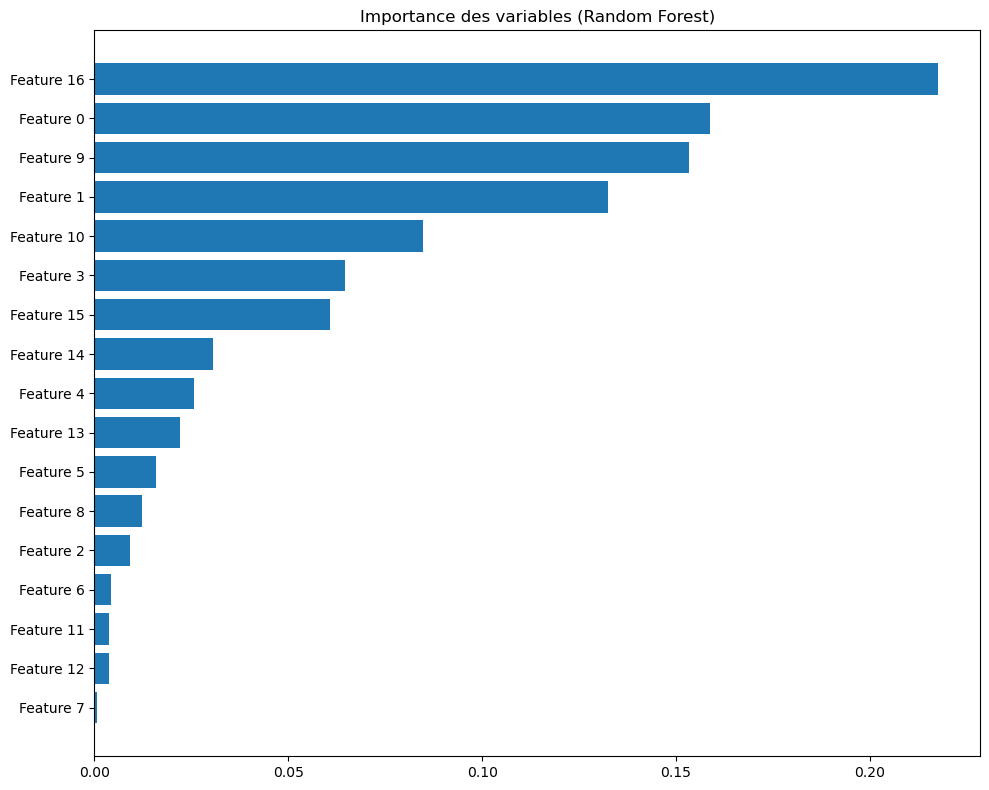

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Charger les données de test
df = pd.read_csv('../Data/Test/Donnees_test.csv')

# 2. Préparer les données pour prédiction
X = df.drop(columns=['Booking_ID'])  # Pas de booking_status ici

# 3. Faire les prédictions avec le pipeline déjà entraîné
y_pred = pipeline.predict(X)

# 4. Si tu veux sauvegarder ou visualiser les résultats de prédiction
df_resultats = df.copy()
df_resultats['prediction'] = y_pred
df_resultats['prediction'] = df_resultats['prediction'].map({1: 'Not_Canceled', 0: 'Canceled'})

# Par exemple, afficher les 10 premières prédictions
print(df_resultats[['prediction']].head(10))

# (Optionnel) Enregistrer dans un CSV
# df_resultats.to_csv('../Data/Test/Resultats_predictions.csv', index=False)

# 5. Importance des variables
rf_model = pipeline.best_estimator_.named_steps['classifier']
preprocessor = pipeline.best_estimator_.named_steps['preprocessor']

# Transformation des données pour avoir les noms de colonnes après préprocessing
X_transformed = preprocessor.transform(X)

# Si c’est une matrice sparse, la convertir
if hasattr(X_transformed, 'toarray'):
    X_transformed = X_transformed.toarray()

# Obtenir les noms des features
if hasattr(preprocessor, 'get_feature_names_out'):
    feature_names = preprocessor.get_feature_names_out()
else:
    feature_names = [f"Feature {i}" for i in range(X_transformed.shape[1])]

# Obtenir les importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)

# Visualisation
plt.figure(figsize=(10, 8))
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), np.array(feature_names)[indices])
plt.title("Importance des variables (Random Forest)")
plt.tight_layout()
plt.show()


In [9]:
print(len(y_pred))

6276


📷 Graphique sauvegardé dans : rfr_predict_errorDecisionTree.png


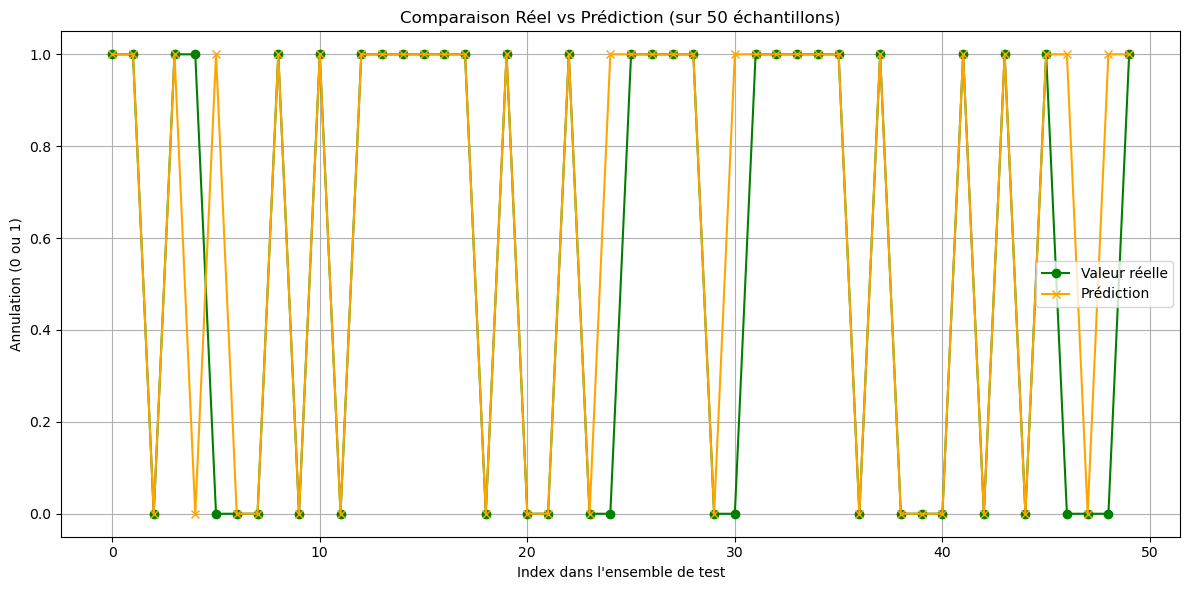

In [20]:
from graph_utils import display_predict_diff_errors2
display_predict_diff_errors2(y_test, y_pred, n=50, save_path="rfr_predict_errorDecisionTree.png")